# Homework 1 #

### Due 11:59 pm Jan 29  (Submit all work including computer codes) ###

In [1]:
import numpy as np
import time
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from scipy.optimize import minimize_scalar

## Question 1 ##

Compute the gradient  $\triangledown f(x)$ and Hessian $\triangledown^{2} f(x)$ of the Rosenbrock function: $f(x) = 100 ( x_{2} − x_{1}^{2} )^{2} + (1 − x_{1} )^{2}$
and show that  $(1, 1)$ is the only local minimizer, where the Hessian matrix is
positive definite. Plot f and its contour lines on $(x,y) \in [-2,2]$ x $[-2,3]$ , with 
sufficient resolution (grid points) in Python or Matlab.

**Show (1,1) is a local minimizer**

Gradient of $f$ : $\triangledown f= \begin{bmatrix} 400 x^{3}_{1} - 400 x_{1}x_{2} + 2 x_{1} -2 \\ 200 ( x_{2} - x^{2}_{1} ) \end{bmatrix}$

Plug in $(1,1)$: 
$\triangledown f = \begin{bmatrix} 0 \\ 0 \end{bmatrix} = 0 $

Therefore, $(1,1)$ is a local minimizer of this function.

**Show that the Hessian is positive definite**

Hessian of $f$ : $\triangledown^{2} f = \begin{bmatrix} 1200 x^{2} - 400 x_{2} + 2 & -400 x_{1} \\ -400 x_{1} & 200 \end{bmatrix}$

$\triangledown^{2} f (1,1) = \begin{bmatrix} 802 & -400 \\ -400 & 200 \end{bmatrix} $ 

The eigenvalues of $(\triangledown^{2} f(1,1))$ are $0.3994$ and $1001.6006$ which are both $ > 0 $, so the Hessian is positive definite.

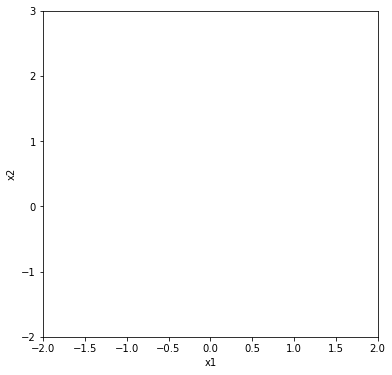

In [2]:
f = lambda x_1, x_2: 100*(x_2 - x_1**2)**2 + (1 - x_1)**2

x_1 = np.linspace(-7,-1,500)
x_2 = np.linspace(0,6,500)
Xmesh,Ymesh = np.meshgrid(x_1,x_2)
Z = f(Xmesh,Ymesh)

plt.figure(figsize=(6, 6)) 

CS = plt.contour(Xmesh,Ymesh,Z,20)
plt.clabel(CS,inline_spacing=0,fmt='%d') 
plt.axis([-2,2,-2,3]) 
plt.xlabel('x1') 
plt.ylabel('x2') 
plt.show() 

## Question 2 ##

Show that the function $f(x) = 8 x_{1} + 12x_{2} + x_{1}^{2} − 2 x_{2}^{2}$  has only one stationary point, and that it is neither a maximum or minimum, but a saddle point (maximum in one direction, minimum in the other). Plot f and its contour lines over a rectangular region containing the saddle.

**Solve for critical points of f**

Gradient of $f$ :
$ \triangledown f= \begin{bmatrix} 8 + 2 x_{1} \\ 12 - 4 x_{2} \end{bmatrix}$

$\triangledown f= 0$ means $x_{1} = -4$ and $x_{2} = 3$

**Show $(-4,3)$ is a saddle point**

Hessian of $f$ : 
$\triangledown^{2} f = \begin{bmatrix} 2 & 0 \\ 0 & -4 \end{bmatrix}$

Determinant: $(2)(-4) - 0 = -8 < 0$

So, this is a saddle point.

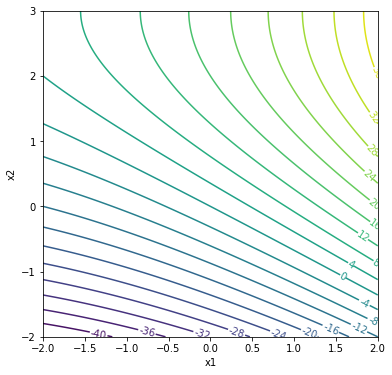

In [3]:
f = lambda x_1, x_2: 8*x_1 + 12*x_2 + x_1**2 - 2*x_2**2

x_1 = np.linspace(-2,2,500)
x_2 = np.linspace(-2,3,500)
Xmesh,Ymesh = np.meshgrid(x_1,x_2)
Z = f(Xmesh,Ymesh)

plt.figure(figsize=(6, 6)) 

CS = plt.contour(Xmesh,Ymesh,Z,20)
plt.clabel(CS,inline_spacing=0,fmt='%d') 
plt.axis([-2,2,-2,3]) 
plt.xlabel('x1') 
plt.ylabel('x2') 
plt.show() 

## Question 3 ##

Consider the function $f(x_{1}, x_{2}) = ( x_{1} + x_{2}^{2} )^{2}$ . At the point $x=(1, 0)$ we consider the search direction $p= (−1, 1)$. Show that $p$ is a descent direction and find all minimizers of the problem $min_{\alpha>0} f (x + \alpha p)$.

**Show $\rho$ is a descent direction**

Gradient of f:
$ \triangledown f= \begin{bmatrix} 2 x_{1} + 2 x^{2}_{2} \\ 4 x_{1} x_{2} + 4 x^{3}_{2} \end{bmatrix}$

Plug in $(1,0)$: 
$\triangledown f= \begin{bmatrix} 2 \\ 0 \end{bmatrix}$

$\rho_{k}^{T} \triangledown f_{k} = \begin{bmatrix} -1 & 1 \end{bmatrix} \begin{bmatrix} 2 \\ 0 \end{bmatrix}$ 
$ = -2 + 0 = -2 < 0 $

Since $\rho < 0$ , $\rho$ is a descent direction.

**Find minimizers**

Set $f (x_{1} + \alpha p , x_{2} + \alpha p) = ((x_{1} + \alpha p) + (x_{2} + \alpha p)^{2})^{2}$.

Plug in $(x_{1},x_{2})=(1,0)$ and $ p = (-1,1)$ to find derivative of f, and we get 
$f' = ((1 - \alpha) + \alpha^{2})^{2} = 4 \alpha^{3} - 6 \alpha^{2} + 8 \alpha - 2 $

Set $f' = 0$, and $\alpha = 1/2$

Set the double derivative of $f$ to get :
$ -12 \alpha^{2} - 12 \alpha + 8$  

Plug in $\alpha = 1/2$ to get $12(1/4) - 12(1/2) + 8 = 3 - 6 + 8 = 5$

Since $5 > 0$, $\alpha = 1/2$ is a minimizer.

## Question 4 ##

Minimize Rosenbrock function in Problem 1 with fixed step length steepest descent method:  
    a) start at $x0 = (1.2, 1.2)$, select a step length $\alpha ≤ 10^{–3}$ so that the method converges. How many iterations does it take to reach $|| p_{k} || = norm(p_{k}) ≤ 10^{-8}$? Plot the minimizing path on contours of $f$.  Find a larger $\alpha$  so that convergence fails, plot the path.   
    b) start at $x0 = (-1.2, 1)$ and repeat a)

**Part a**

In [4]:
def QObjFunc(x): # f
    return 100*(x[1] - x[0]**2)**2 + (1-(x[0]))**2

In [5]:
def QGradObjFunc(x): # gradient of f
    return np.array([200*(x[1] - x[0]**2)* -2*x[0] + 2*(1-x[0])*-1, 200*(x[1] - x[0]**2)*1])

In [6]:
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

Found the minimizer at [1.00000001 1.00000002] with 40801 iterations successfully, gradient's norm is 9.997874712185763e-09.


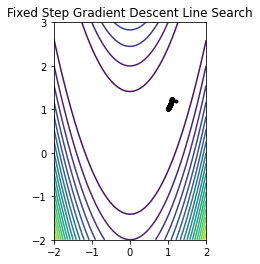

In [7]:
x0 = [1.2,1.2]
tol = 1e-8
maxIter = 100000
alpha = 1e-3
x_1, iter_1, path_1 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)

x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 3, 500)
X, Y = np.meshgrid(x, y)
Z = QObjFunc([X,Y])

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 20);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')
plt.show()

Unable to locate minimizer within maximum iterations, last position is at [0.99758422 0.99870893], gradient's norm is 1.582009721326888


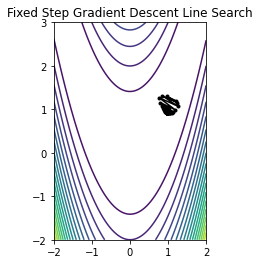

In [8]:
x0 = [1.2,1.2]
tol = 1e-8
maxIter = 100000
alpha = 2e-3
x_1, iter_1, path_1 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)

x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 3, 500)
X, Y = np.meshgrid(x, y)
Z = QObjFunc([X,Y])

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 20);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')
plt.show()

**Part b**

Found the minimizer at [0.99999999 0.99999998] with 43605 iterations successfully, gradient's norm is 9.999079573620442e-09.


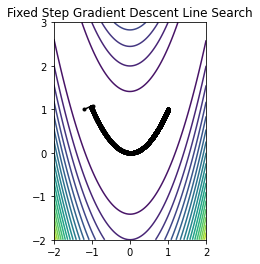

In [9]:
x0 = [-1.2,1]
tol = 1e-8
maxIter = 100000
alpha = 1e-3
x_1, iter_1, path_1 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)

x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 3, 500)
X, Y = np.meshgrid(x, y)
Z = QObjFunc([X,Y])

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 20);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')
plt.show()

Unable to locate minimizer within maximum iterations, last position is at [0.99758422 0.99870893], gradient's norm is 1.582009721326888


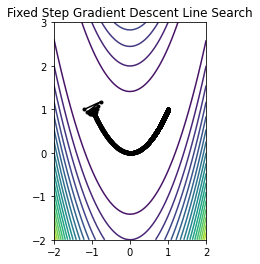

In [10]:
x0 = [-1.2,1]
tol = 1e-8
maxIter = 100000
alpha = 2e-3
x_1, iter_1, path_1 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)

x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 3, 500)
X, Y = np.meshgrid(x, y)
Z = QObjFunc([X,Y])

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 20);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')
plt.show()